In [2]:
# Standard Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-Learn Preprocessing & Feature Selection
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest, f_classif

# Scikit-Learn Model Selection & Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_predict, KFold
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    precision_recall_curve, roc_auc_score, precision_score, 
    recall_score, f1_score, make_scorer
)

# Machine Learning Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, 
    AdaBoostClassifier, ExtraTreesClassifier
)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Save/Load Models
import joblib

# Additional Utilities
from sklearn import preprocessing


In [3]:
# Reading File
df = pd.read_csv('D:\JUST LESSONS\defense\ml part\interface part\dataset\Train_data_Dataset.csv', encoding='latin')

In [4]:
df.head(5)

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  attack_label  
0                      0.00        normal  
1                      0.00        normal  
2                      0.00       anomaly  
3                      0.01        normal  
4                      0.00        normal  

[5 rows x 42 columns]

In [5]:
df.tail()

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
25187         0           tcp      exec  RSTO          0          0     0   
25188         0           tcp  ftp_data    SF        334          0     0   
25189         0           tcp   private   REJ          0          0     0   
25190         0           tcp      nnsp    S0          0          0     0   
25191         0           tcp    finger    S0          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
25187               0       0    0  ...                   7   
25188               0       0    0  ...                  39   
25189               0       0    0  ...                  13   
25190               0       0    0  ...                  20   
25191               0       0    0  ...                  49   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
25187                    0.03                    0.06   
25188                    1.00                    0.00   
25189                    0.05                    0.07   
25190                    0.08                    0.06   
25191                    0.19                    0.03   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
25187                         0.00                         0.00   
25188                         1.00                         0.18   
25189                         0.00                         0.00   
25190                         0.00                         0.00   
25191                         0.01                         0.00   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
25187                   0.0                       0.0                   1.0   
25188                   0.0                       0.0                   0.0   
25189                   0.0                       0.0                   1.0   
25190                   1.0                       1.0                   0.0   
25191                   1.0                       1.0                   0.0   

       dst_host_srv_rerror_rate  attack_label  
25187                       1.0       anomaly  
25188                       0.0       anomaly  
25189                       1.0       anomaly  
25190                       0.0       anomaly  
25191                       0.0       anomaly  

[5 rows x 42 columns]

In [6]:
#display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [7]:
df.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

In [8]:
# Data preprocessing

In [9]:
df['attack_label'].value_counts()

attack_label
normal     13449
anomaly    11743
Name: count, dtype: int64

In [10]:
#Number of sentences
label = list(set(df["attack_label"].values))
print("Class:", label)
label_n = len(label)
print("Number of Labels: ", label_n)

Class: ['normal', 'anomaly']
Number of Labels:  2


In [11]:
#checking missing values
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
#number of normal and intrusion
x,y= df['attack_label'].value_counts()
print("Normal:",x)
print("anomaly:",y)

Normal: 13449
anomaly: 11743


In [13]:
print("Total number of protocols in the dataset: {:,}".format(df["protocol_type"].nunique()))

Total number of protocols in the dataset: 3


In [14]:
    print("Total number of services in the dataset: {:,}".format(df["service"].nunique()))

Total number of services in the dataset: 66


In [15]:
# Only Normal Traffic
normal = df[df['attack_label'] == 'normal']
normal.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0          0           tcp  ftp_data   SF        491          0     0   
1          0           udp     other   SF        146          0     0   
3          0           tcp      http   SF        232       8153     0   
4          0           tcp      http   SF        199        420     0   
12         0           tcp      http   SF        287       2251     0   

    wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                0       0    0  ...                  25   
1                0       0    0  ...                   1   
3                0       0    0  ...                 255   
4                0       0    0  ...                 255   
12               0       0    0  ...                 219   

    dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.17                    0.03   
1                     0.00                    0.60   
3                     1.00                    0.00   
4                     1.00                    0.00   
12                    1.00                    0.00   

    dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                          0.17                         0.00   
1                          0.88                         0.00   
3                          0.03                         0.04   
4                          0.00                         0.00   
12                         0.12                         0.03   

    dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.00                      0.00                  0.05   
1                   0.00                      0.00                  0.00   
3                   0.03                      0.01                  0.00   
4                   0.00                      0.00                  0.00   
12                  0.00                      0.00                  0.00   

    dst_host_srv_rerror_rate  attack_label  
0                       0.00        normal  
1                       0.00        normal  
3                       0.01        normal  
4                       0.00        normal  
12                      0.00        normal  

[5 rows x 42 columns]

In [16]:
#Only anomaly traffic
anomaly = df[df['attack_label'] == 'anomaly']
anomaly.head()

duration protocol_type     service flag  src_bytes  dst_bytes  land  \
2         0           tcp     private   S0          0          0     0   
5         0           tcp     private  REJ          0          0     0   
6         0           tcp     private   S0          0          0     0   
7         0           tcp     private   S0          0          0     0   
8         0           tcp  remote_job   S0          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
2               0       0    0  ...                  26   
5               0       0    0  ...                  19   
6               0       0    0  ...                   9   
7               0       0    0  ...                  15   
8               0       0    0  ...                  23   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
2                    0.10                    0.05   
5                    0.07                    0.07   
6                    0.04                    0.05   
7                    0.06                    0.07   
8                    0.09                    0.05   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
2                          0.0                          0.0   
5                          0.0                          0.0   
6                          0.0                          0.0   
7                          0.0                          0.0   
8                          0.0                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
2                   1.0                       1.0                   0.0   
5                   0.0                       0.0                   1.0   
6                   1.0                       1.0                   0.0   
7                   1.0                       1.0                   0.0   
8                   1.0                       1.0                   0.0   

   dst_host_srv_rerror_rate  attack_label  
2                       0.0       anomaly  
5                       1.0       anomaly  
6                       0.0       anomaly  
7                       0.0       anomaly  
8                       0.0       anomaly  

[5 rows x 42 columns]

In [17]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ' '.join(all_list)
    return clean_str
df['protocol_type'] = df['protocol_type'].apply(punctuation_removal)

attack_label
anomaly    11743
normal     13449
Name: protocol_type, dtype: int64


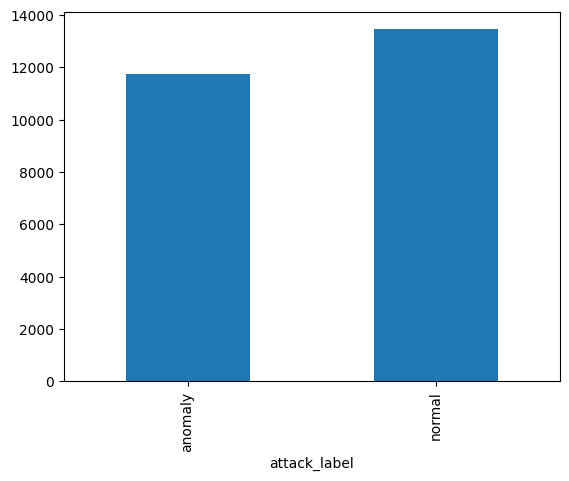

In [18]:
# How many Normal and Anomaly?
print(df.groupby(['attack_label'])['protocol_type'].count())
df.groupby(['attack_label'])['protocol_type'].count().plot(kind="bar")
plt.show()

In [19]:
#Data Visualization

In [20]:
def plot_bar_pie(df):
    protocol_counts = df['protocol_type'].value_counts()

    # Ensure enough colors for all categories
    num_protocols = len(protocol_counts)
    colors = sns.color_palette("pastel", num_protocols)  # Auto-generate enough colors

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Bar chart
    ax1.set_title('Distribution of Protocol Using Bar Plot')
    sns.barplot(x=protocol_counts.index, y=protocol_counts.values, hue=protocol_counts.index, 
                palette=colors, legend=False, ax=ax1)  # Assign hue to fix warning
    ax1.set_xlabel('Protocol_type')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)

    # Add labels on top of bars
    for i, value in enumerate(protocol_counts.values):
        y_coord = value + 0.05 * ax1.get_ylim()[1]  # Offset to avoid overlap
        ax1.text(i, y_coord, str(value), ha='center', va='bottom')

    # Pie chart
    ax2.set_title('Distribution of Protocol Using Pie Chart')
    ax2.pie(protocol_counts.values, labels=protocol_counts.index, colors=colors, autopct='%1.1f%%')
    ax2.axis('equal')

    plt.subplots_adjust(wspace=0.3)
    plt.show()

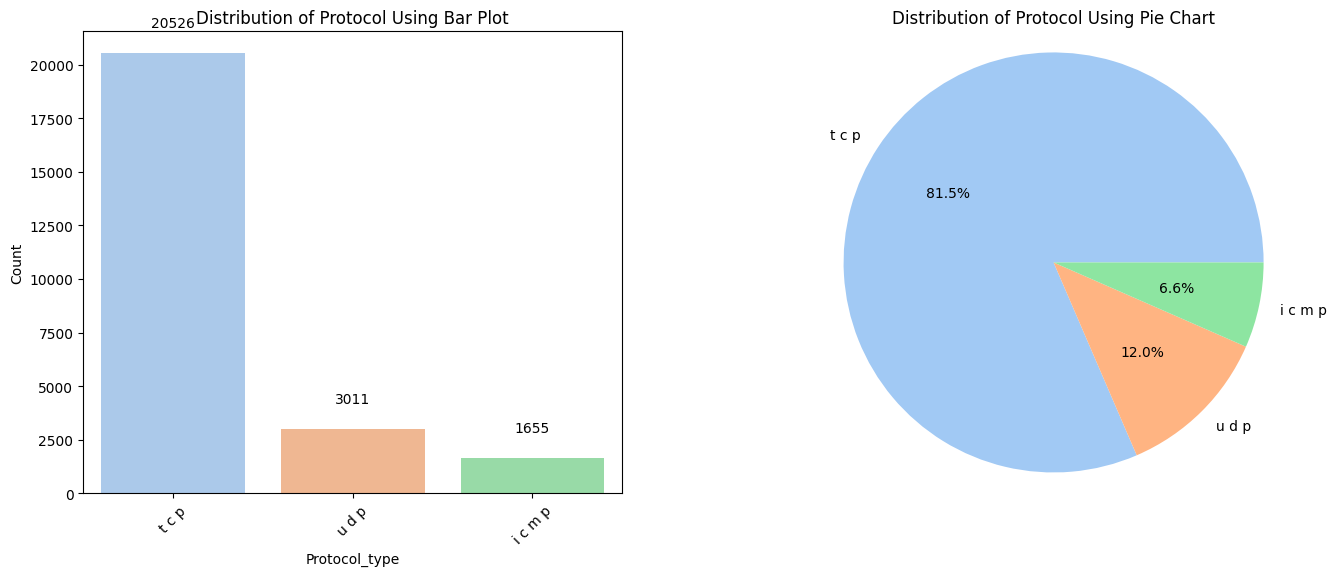

In [21]:
plot_bar_pie(df)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar_pie(df):
    flag_counts = df['flag'].value_counts()

    # Use actual labels (no need to remap them)
    labels = flag_counts.index

    # Ensure enough colors for all categories
    colors = sns.color_palette("pastel", len(labels))  # Generate colors dynamically

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Bar chart
    ax1.set_title('Distribution of Abuse Using Bar Plot')
    sns.barplot(x=labels, y=flag_counts.values, hue=labels, palette=colors, legend=False, ax=ax1)  # ✅ FIXED

    ax1.set_xlabel(' flag')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)

    # Add labels on top of bars
    for i, value in enumerate(flag_counts.values):
        y_coord = value + 0.05 * ax1.get_ylim()[1]  # Offset to avoid overlap
        ax1.text(i, y_coord, str(value), ha='center', va='bottom')

    # Pie chart
    ax2.set_title('Distribution of Abuse Using Pie Plot')
    ax2.pie(flag_counts.values, labels=labels, colors=colors, autopct='%1.1f%%')
    ax2.axis('equal')

    plt.subplots_adjust(wspace=0.3)
    plt.show()


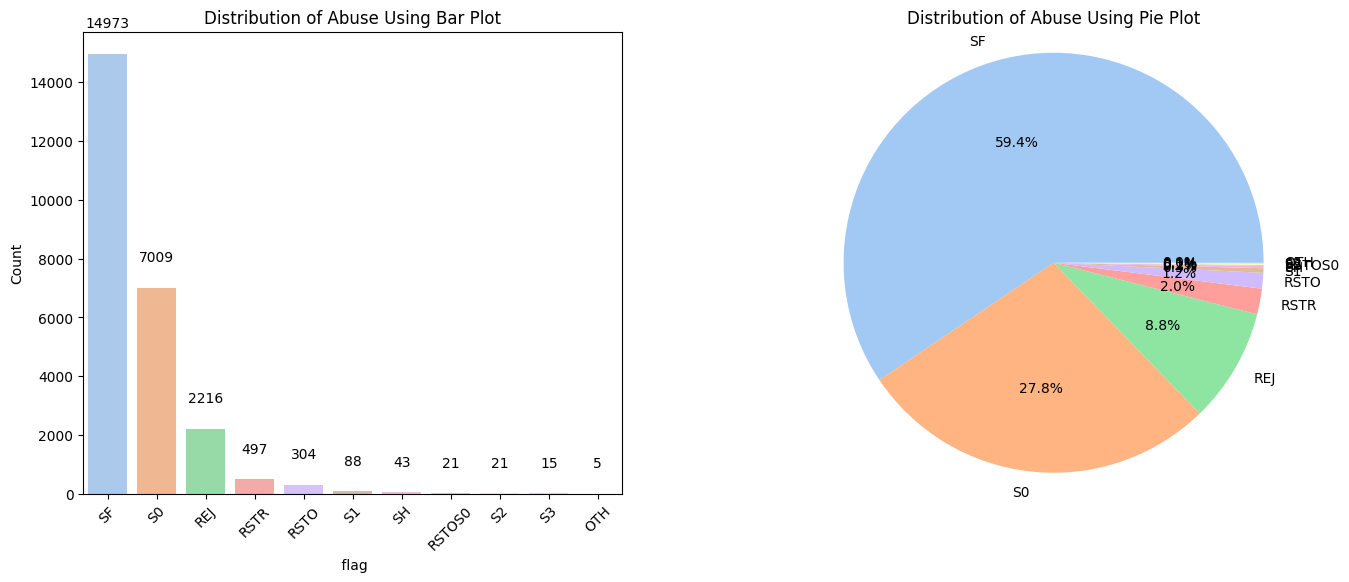

In [23]:
plot_bar_pie(df)

In [24]:
def cat_var(df):
    """ this function takes a dataframe df, and returs all categorical columns and their values"""
    for col in df.columns:
        if df[col].dtype == object:
            print (f"column name: {col}")
            print (f"........................................")
            print(f"{df[col].value_counts()}")
            print (f"........................................")

In [25]:
cat_var(df)

column name: protocol_type
........................................
protocol_type
t c p      20526
u d p       3011
i c m p     1655
Name: count, dtype: int64
........................................
column name: service
........................................
service
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: count, Length: 66, dtype: int64
........................................
column name: flag
........................................
flag
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: count, dtype: int64
........................................
column name: attack_label
........................................
attack_label
normal     13449
anomaly    11743
Name: count, dtype: int64
......

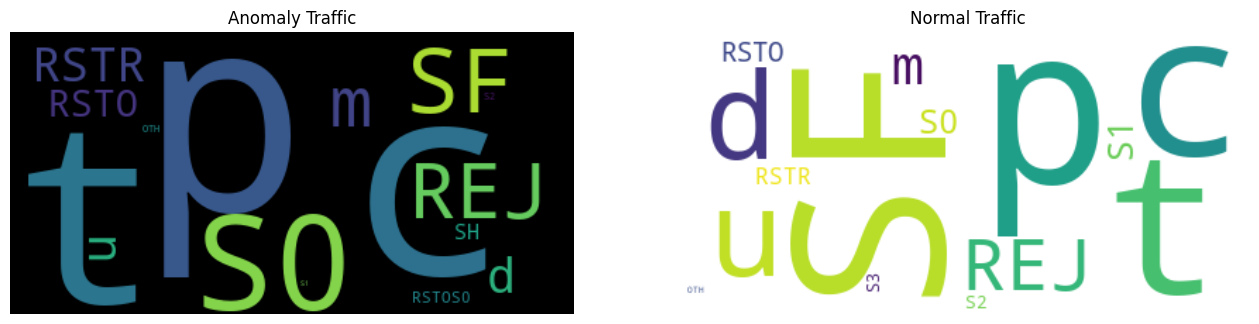

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fix: Filter using "normal" and "anomaly" instead of 1 and 0
normal_df = df[df['attack_label'] == "normal"]  # Normal traffic
anomaly_df = df[df['attack_label'] == "anomaly"]  # Anomalous traffic

# Combine multiple text columns into a single string
normal_text = " ".join(normal_df[['protocol_type', 'flag']].dropna().astype(str).stack())
anomaly_text = " ".join(anomaly_df[['protocol_type', 'flag']].dropna().astype(str).stack())

# Ensure there is at least some text (to prevent empty WordCloud errors)
if not normal_text:
    normal_text = "NoData"
if not anomaly_text:
    anomaly_text = "NoData"

# Generate Word Clouds
normal_wc = WordCloud(collocations=False, background_color='white').generate(normal_text)
anomaly_wc = WordCloud(collocations=False, background_color='black').generate(anomaly_text)

# Plot Word Clouds
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].imshow(anomaly_wc, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Anomaly Traffic')

axs[1].imshow(normal_wc, interpolation='bilinear')  # ✅ Fixed: Showing normal traffic
axs[1].axis('off')
axs[1].set_title('Normal Traffic')

plt.show()


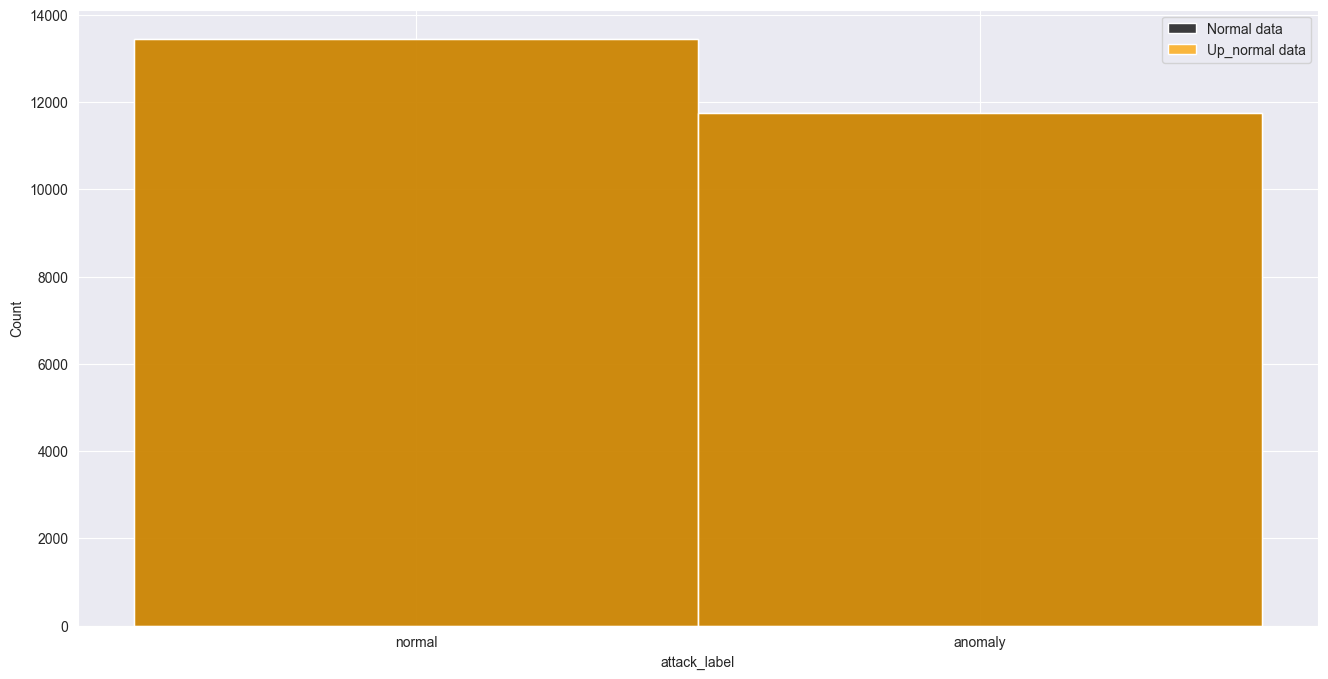

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
sns.histplot(data = df['attack_label'], color='black', legend=True)
sns.histplot(data = df['attack_label'], color = 'orange', legend=True)
plt.legend(['Normal data', 'Up_normal data'])
plt.show()

In [28]:
# visualizes the count of occurrences of each attack label

In [29]:
import plotly.express as px
labelChecker=df.groupby('attack_label').apply(lambda x:x['protocol_type'].count()).reset_index(name='Counts')
fig=px.bar(labelChecker,x='attack_label',y='Counts',color='Counts',title='Count of News Articles by Label')
fig.show()

In [30]:
import plotly.express as px

# Fix filtering condition (use "normal" and "anomaly" instead of 0 and 1)
normal = len(df[df['attack_label'] == "normal"])
anomaly = len(df[df['attack_label'] == "anomaly"])

# Define labels and counts
Platform = ['Normal Traffic', 'Anomaly Traffic']
Count = [normal, anomaly]

# Create Pie Chart
fig = px.pie(
    names=Platform,
    values=Count,
    title='Traffic Distribution Using Pie Chart',
    color_discrete_sequence=px.colors.sequential.Agsunset
)

# Format Pie Chart
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the chart
fig.show()


In [31]:
# 1️⃣ Bar Chart - Distribution of Protocol
protocol_counts = df['protocol_type'].value_counts()
fig1 = px.bar(x=protocol_counts.index, y=protocol_counts.values, 
              title="Protocol Distribution", labels={'x':'Protocol', 'y':'Count'}, 
              color=protocol_counts.index)
fig1.show()

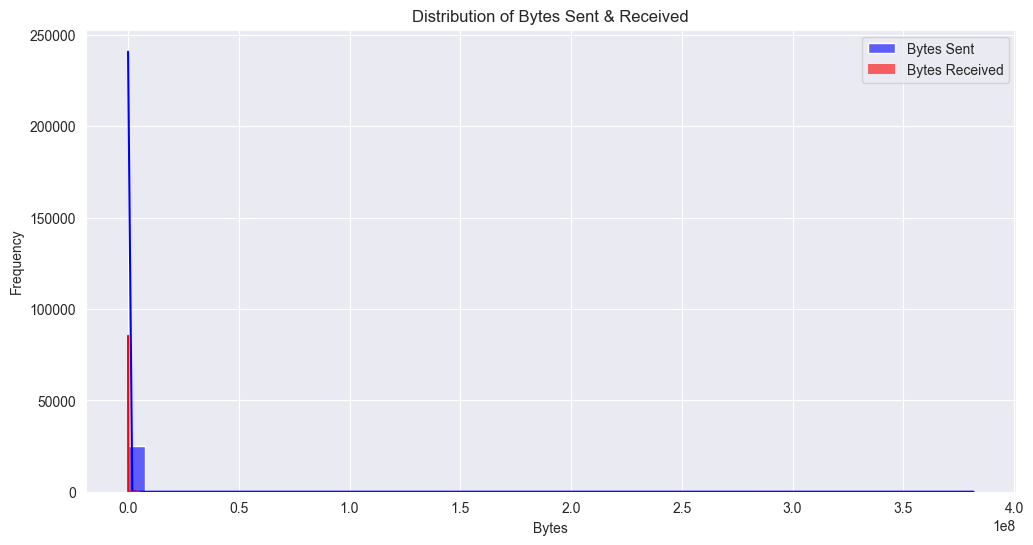

In [32]:
# 2️⃣ Histogram - Distribution of Bytes Sent & Received
plt.figure(figsize=(12,6))
sns.histplot(df['src_bytes'], bins=50, kde=True, color='blue', label="Bytes Sent", alpha=0.6)
sns.histplot(df['dst_bytes'], bins=50, kde=True, color='red', label="Bytes Received", alpha=0.6)
plt.title("Distribution of Bytes Sent & Received")
plt.xlabel("Bytes")
plt.ylabel("Frequency")
plt.legend()
plt.show()

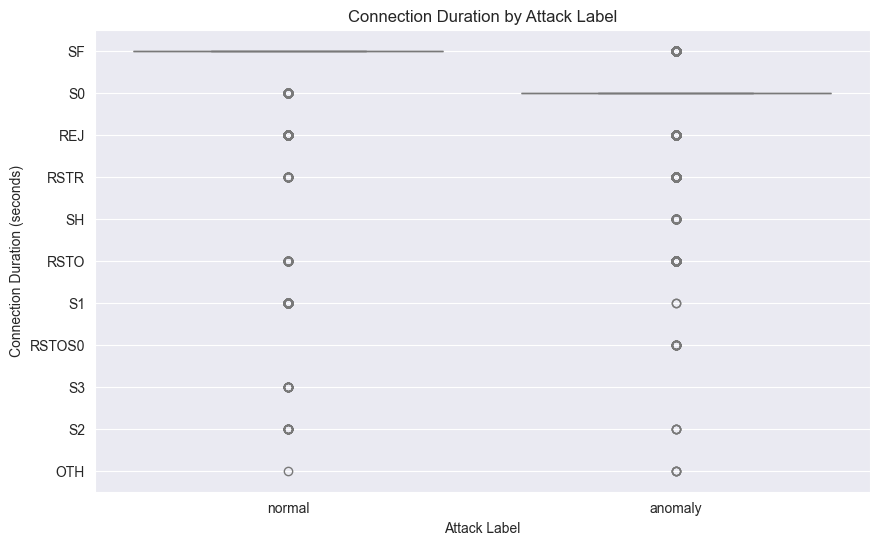

In [33]:
# 3️⃣ Box Plot - Connection Duration vs Attack Label
plt.figure(figsize=(10,6))
sns.boxplot(x=df['attack_label'], y=df['flag'], hue=df['attack_label'], 
            palette="coolwarm", legend=False)  # ✅ FIXED
plt.title("Connection Duration by Attack Label")
plt.xlabel("Attack Label")
plt.ylabel("Connection Duration (seconds)")
plt.show()

In [34]:
# 4️⃣ Pie Chart - Connection Status Distribution
connection_status_counts = df['flag'].value_counts()
fig2 = px.pie(names=connection_status_counts.index, values=connection_status_counts.values, 
              title="Connection Status Distribution", color_discrete_sequence=px.colors.sequential.Agsunset)
fig2.show()

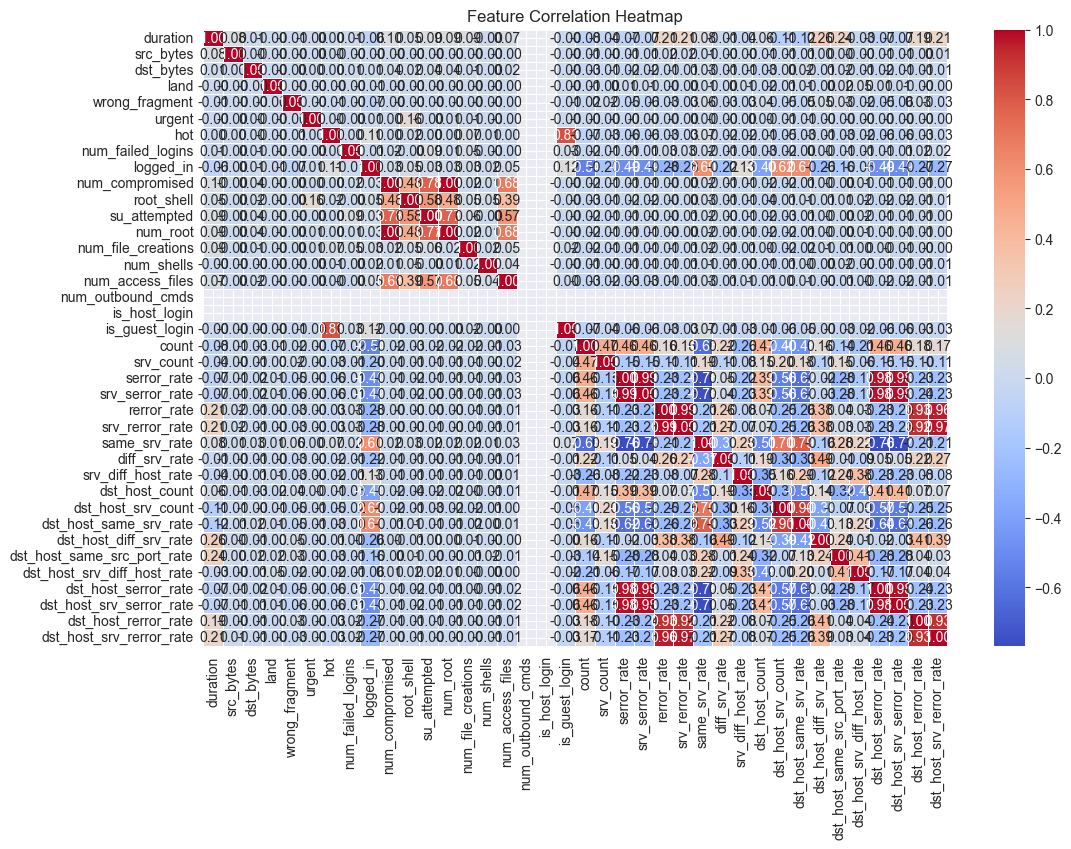

In [35]:
# 5️⃣ Heatmap - Correlation Matrix of Numerical Features
plt.figure(figsize=(12,8))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [36]:
# # Calculating the correlation matrix for numeric columns
# correlation_matrix = df.select_dtypes(include=np.number).corr()

# # Displaying the correlation matrix
# print(f"Correlation Matrix:\n {correlation_matrix}")

In [37]:
# Creating training and tests

In [38]:
df["attack_label"].value_counts(normalize=True)

attack_label
normal     0.53386
anomaly    0.46614
Name: proportion, dtype: float64

In [39]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['protocol_type', 'service', 'flag']

# Initialize LabelEncoders for each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders if you need to inverse transform later

# Encode the target label column
label_le = LabelEncoder()
df['label'] = label_le.fit_transform(df['attack_label'])  # e.g. 'normal'->1, 'anomaly'->0 or similar

# Now your df is fully encoded and ready for train/test split


In [59]:
for col in categorical_cols:
    print(f"{col}: {list(label_encoders[col].classes_)}")

protocol_type: ['i c m p', 't c p', 'u d p']
service: ['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'hostnames', 'http', 'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois']
flag: ['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']


In [40]:
# Define original KDD99 features
feature_columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate'
]

# Target column
target_column = 'attack_label'  # Or whatever your target column is named

# Prepare X and y
X = df[feature_columns]
y = df[target_column]


In [41]:
#Split your data into training and testing sets with stratification

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [42]:
#smote balanced data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [43]:
# Scale Feature

In [44]:
from sklearn.preprocessing import StandardScaler

# List all numeric features including original KDD99 numeric features + engineered features
numeric_cols = [
    'duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent',
    'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
    'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count',
    'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
]

# Initialize the scaler
scaler = StandardScaler()

# Create copies of balanced training data and original test data before scaling
X_train_scaled = X_train_balanced.copy()
X_test_scaled = X_test.copy()

# Apply scaling only to numeric columns on the SMOTE balanced training data
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_balanced[numeric_cols])

# Apply scaling on the original test data with the same scaler
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [45]:
# BUILDING MECHINE LEARNING MODELS

In [46]:
def getConfusionMatrix(pred, true, title):
  # computing confusion matrix
  cf_matrix = confusion_matrix(true, pred)
  group_names = ["TP", "FP", "FN", "TN"]
  group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  Sumad = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
  Sumad = np.asarray(Sumad).reshape(2, 2)
  ax = sns.heatmap(cf_matrix, annot=Sumad, fmt="")
  # ax.set_title('Confusion Matrix - ' + title + '\n' + stats_text)
  plt.suptitle("Confusion Matrix - " + title, y=1.05, weight='black', fontsize=24)
  plt.figure(figsize=(45,30))
  # plt.title(stats_text)
  plt.savefig(title + '.png', bbox_inches='tight')

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def get_roc(y_test, y_pred, pos_label='normal'):
    """
    Plots ROC curve and computes AUC score.

    Parameters:
    y_test (array-like): True binary labels (can be strings like 'normal', 'anomaly').
    y_pred (array-like): Predicted scores (probabilities) for positive class.
    pos_label (str or int): Label considered positive for ROC calculation.
    """
    fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=pos_label)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


Confusion Matrix:
[[2339   10]
 [   1 2689]]

Classification Report:
              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2349
      normal       1.00      1.00      1.00      2690

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



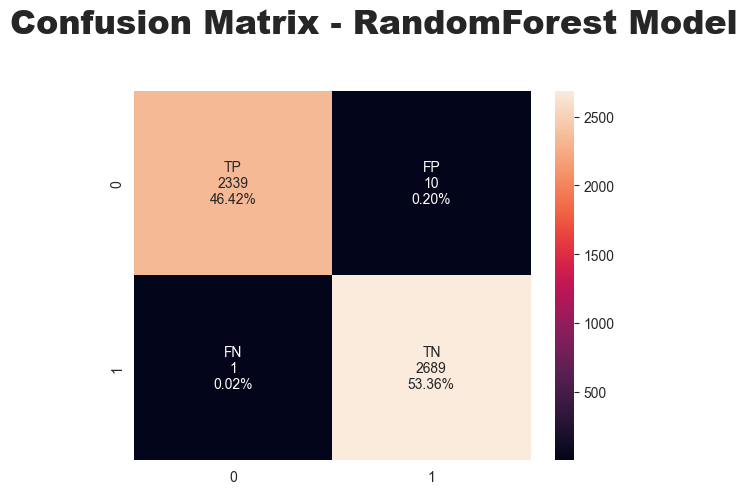

<Figure size 4500x3000 with 0 Axes>

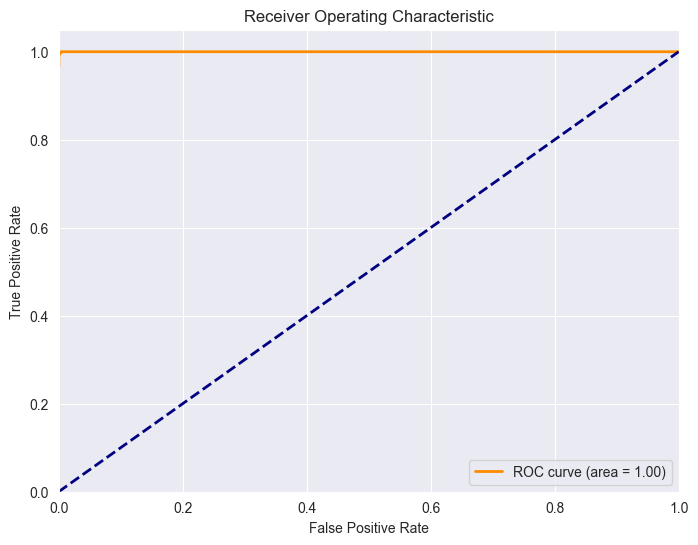

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest on balanced and scaled training data
RF = RandomForestClassifier(n_estimators=600, random_state=42)
RF.fit(X_train_scaled, y_train_balanced)

# Predict on scaled test data
predict_rf = RF.predict(X_test_scaled)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, predict_rf))
print("\nClassification Report:")
print(classification_report(y_test, predict_rf))

# Plot confusion matrix
getConfusionMatrix(pred=predict_rf, true=y_test, title='RandomForest Model')

# Plot ROC curve
y_scores = RF.predict_proba(X_test_scaled)[:, 1]
get_roc(y_test, y_scores)


[[2684    6]
 [   4 2345]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2690
           1       1.00      1.00      1.00      2349

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



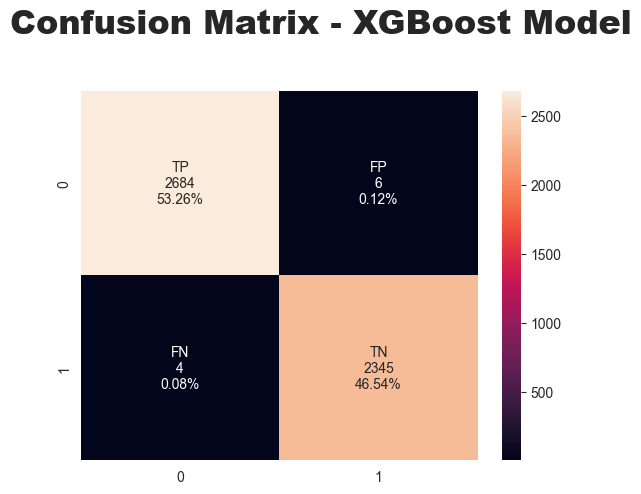

<Figure size 4500x3000 with 0 Axes>

In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

# ✅ Convert categorical labels to numeric
y_train_numeric = y_train.replace({'normal': 0, 'anomaly': 1})
y_test_numeric = y_test.replace({'normal': 0, 'anomaly': 1})

# ✅ Train XGBoost Model
XGB = XGBClassifier(random_state=22, learning_rate=0.9)
XGB.fit(X_train, y_train_numeric)  # ✅ Use numeric labels

# ✅ Model Prediction
predict_xgb = XGB.predict(X_test)

# ✅ Displaying Confusion Matrix Report
print(confusion_matrix(y_test_numeric, predict_xgb))
print(classification_report(y_test_numeric, predict_xgb))

# ✅ Calling `getConfusionMatrix` function
getConfusionMatrix(pred=predict_xgb, true=y_test_numeric, title='XGBoost Model')


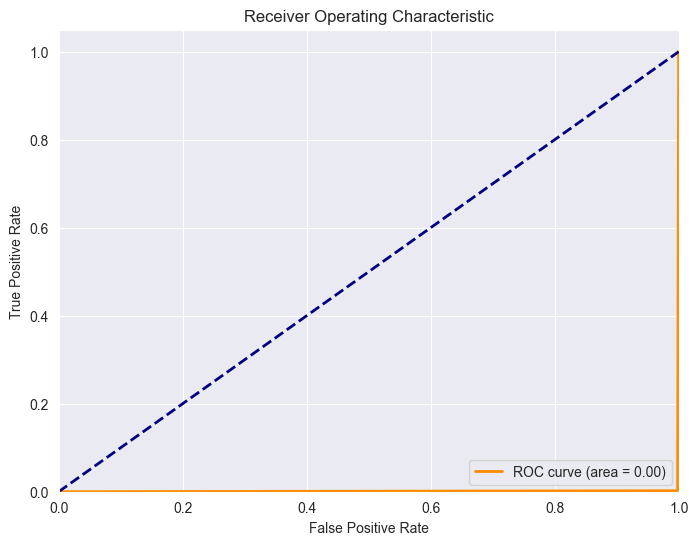

In [50]:
get_roc(y_test,predict_xgb)

Confusion Matrix:
[[2214  135]
 [  84 2606]]

Classification Report:
              precision    recall  f1-score   support

     anomaly       0.96      0.94      0.95      2349
      normal       0.95      0.97      0.96      2690

    accuracy                           0.96      5039
   macro avg       0.96      0.96      0.96      5039
weighted avg       0.96      0.96      0.96      5039



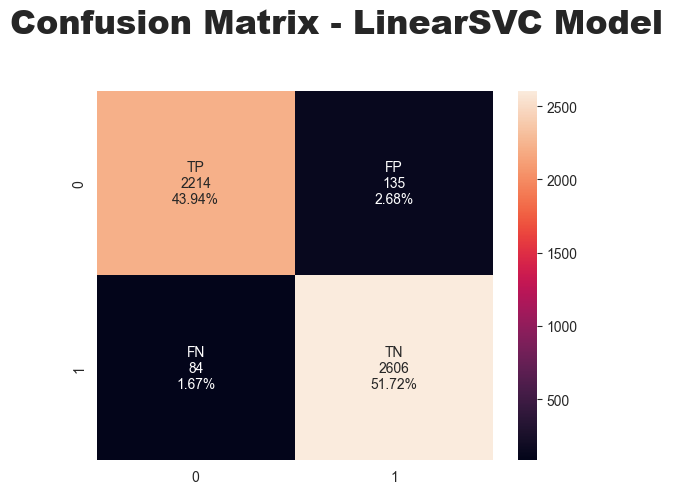

<Figure size 4500x3000 with 0 Axes>

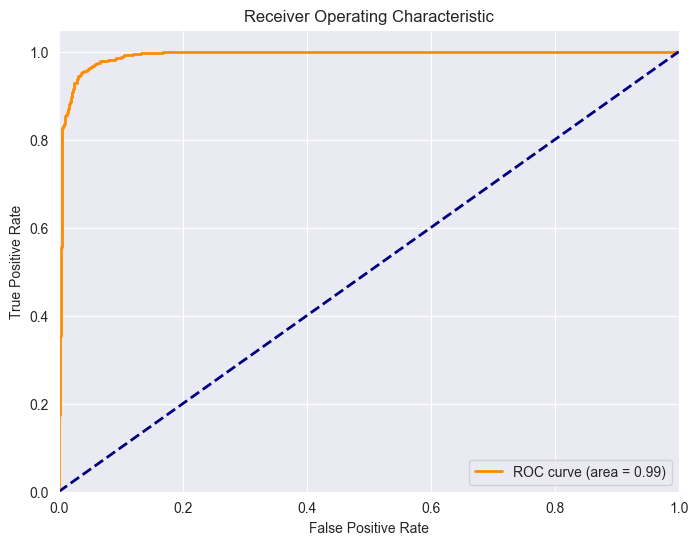

In [51]:
from sklearn.svm import LinearSVC 
from sklearn.metrics import classification_report, confusion_matrix

lin_clf = LinearSVC(random_state=42, max_iter=10000)
lin_clf.fit(X_train_scaled, y_train_balanced)

predict_SVC = lin_clf.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predict_SVC))
print("\nClassification Report:")
print(classification_report(y_test, predict_SVC))

getConfusionMatrix(pred=predict_SVC, true=y_test, title='LinearSVC Model')

y_scores = lin_clf.decision_function(X_test_scaled)
get_roc(y_test, y_scores, pos_label='normal')


Confusion Matrix:
[[2220  129]
 [  93 2597]]

Classification Report:
              precision    recall  f1-score   support

     anomaly       0.96      0.95      0.95      2349
      normal       0.95      0.97      0.96      2690

    accuracy                           0.96      5039
   macro avg       0.96      0.96      0.96      5039
weighted avg       0.96      0.96      0.96      5039



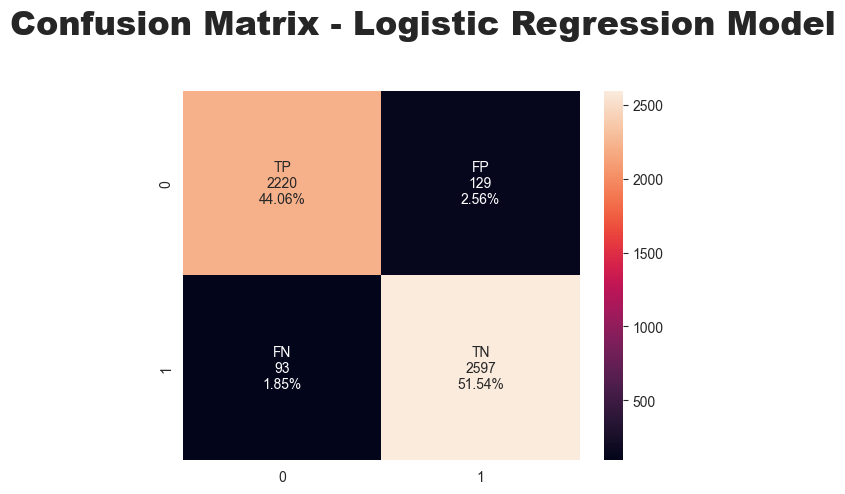

<Figure size 4500x3000 with 0 Axes>

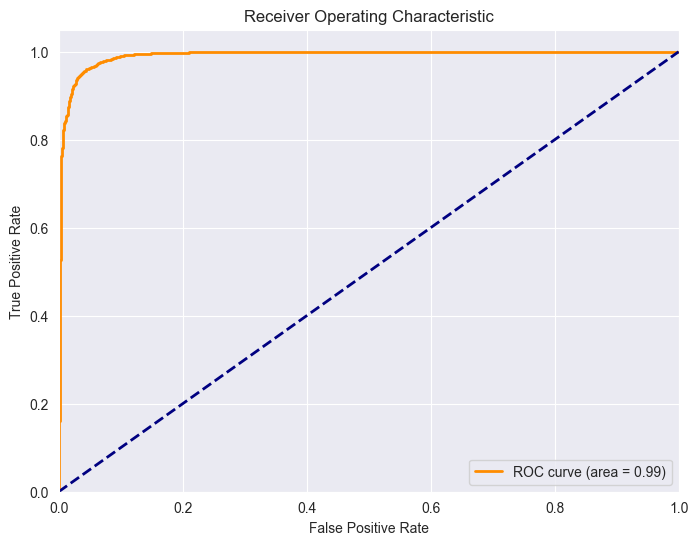

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Train on balanced and scaled training data
logreg.fit(X_train_scaled, y_train_balanced)

# Predict on scaled test data
predict_logr = logreg.predict(X_test_scaled)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, predict_logr))
print("\nClassification Report:")
print(classification_report(y_test, predict_logr))

# Plot confusion matrix with your custom function
getConfusionMatrix(pred=predict_logr, true=y_test, title='Logistic Regression Model')

# Plot ROC curve using predicted probabilities
y_scores = logreg.predict_proba(X_test_scaled)[:, 1]
get_roc(y_test, y_scores, pos_label='normal')  # Adjust pos_label as needed


Confusion Matrix:
[[2214  135]
 [  84 2606]]

Classification Report:
              precision    recall  f1-score   support

     anomaly       0.96      0.94      0.95      2349
      normal       0.95      0.97      0.96      2690

    accuracy                           0.96      5039
   macro avg       0.96      0.96      0.96      5039
weighted avg       0.96      0.96      0.96      5039



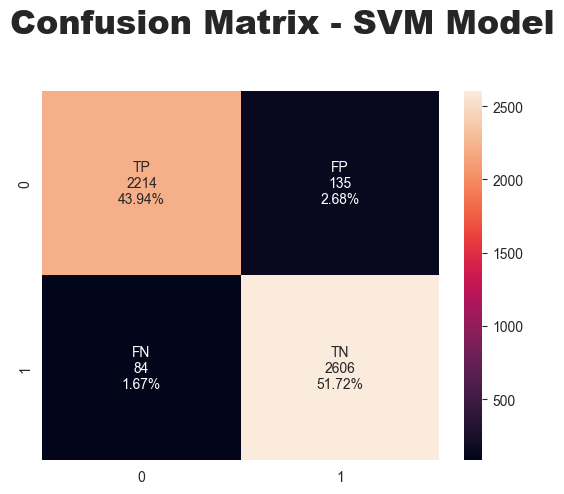

<Figure size 4500x3000 with 0 Axes>

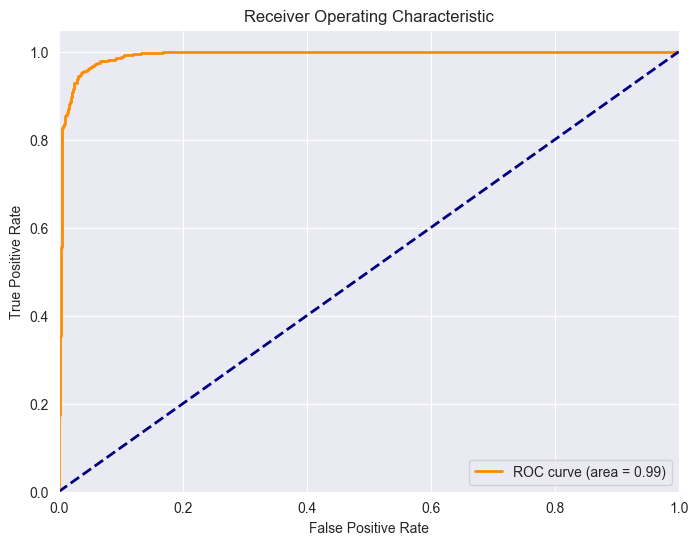

In [53]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize LinearSVC with increased max_iter and fixed random_state
lin_clf = LinearSVC(random_state=42, max_iter=10000)

# Train on balanced and scaled training data
lin_clf.fit(X_train_scaled, y_train_balanced)

# Predict on scaled test data
predict_svm = lin_clf.predict(X_test_scaled)

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, predict_svm))
print("\nClassification Report:")
print(classification_report(y_test, predict_svm))

# Plot confusion matrix
getConfusionMatrix(pred=predict_svm, true=y_test, title='SVM Model')

# Plot ROC curve using decision function scores
y_scores = lin_clf.decision_function(X_test_scaled)
get_roc(y_test, y_scores, pos_label='normal')  # Adjust pos_label if needed


Confusion Matrix:
[[2341    8]
 [  14 2676]]

Classification Report:
              precision    recall  f1-score   support

     anomaly       0.99      1.00      1.00      2349
      normal       1.00      0.99      1.00      2690

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



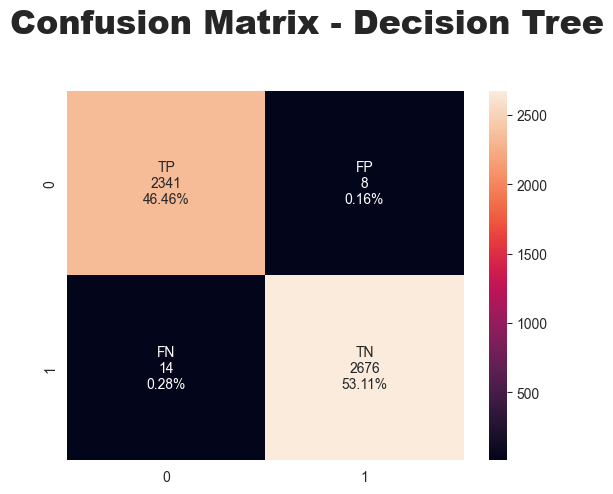

<Figure size 4500x3000 with 0 Axes>

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Decision Tree classifier
classifier_dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train on balanced and scaled training data
classifier_dt.fit(X_train_scaled, y_train_balanced)

# Predict on scaled test data
predict_dt = classifier_dt.predict(X_test_scaled)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, predict_dt))
print("\nClassification Report:")
print(classification_report(y_test, predict_dt))

# Plot confusion matrix
getConfusionMatrix(pred=predict_dt, true=y_test, title='Decision Tree')


Confusion Matrix:
[[2333   16]
 [  12 2678]]

Classification Report:
              precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      2349
      normal       0.99      1.00      0.99      2690

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



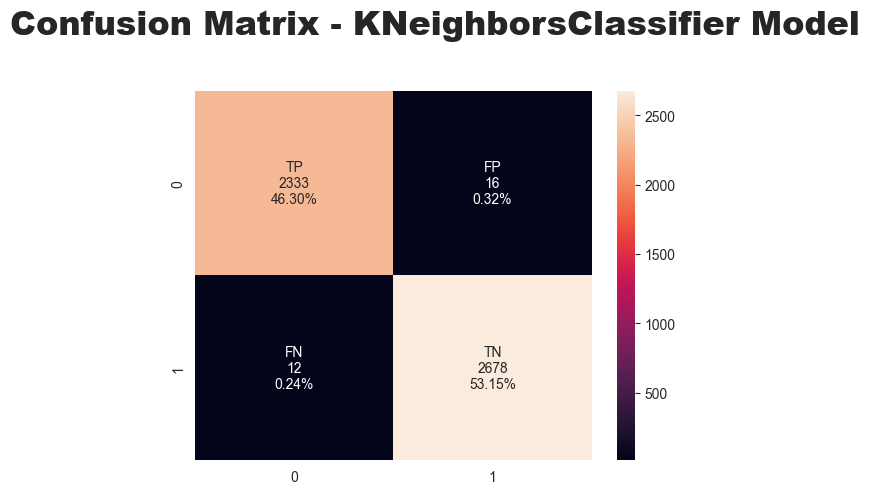

<Figure size 4500x3000 with 0 Axes>

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Train on balanced and scaled training data
classifier_knn.fit(X_train_scaled, y_train_balanced)

# Predict on scaled test data
predict_knn = classifier_knn.predict(X_test_scaled)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, predict_knn))
print("\nClassification Report:")
print(classification_report(y_test, predict_knn))

# Plot confusion matrix
getConfusionMatrix(pred=predict_knn, true=y_test, title='KNeighborsClassifier Model')


In [56]:
from sklearn.metrics import accuracy_score

# ✅ Convert y_test to Numeric
y_test_numeric = y_test.replace({'normal': 0, 'anomaly': 1})

# ✅ Convert all model predictions to numeric format
predict_rf_numeric = pd.Series(predict_rf).replace({'normal': 0, 'anomaly': 1})
predict_xgb_numeric = pd.Series(predict_xgb).replace({'normal': 0, 'anomaly': 1})
predict_svc_numeric = pd.Series(predict_SVC).replace({'normal': 0, 'anomaly': 1})
predict_lr_numeric = pd.Series(predict_logr).replace({'normal': 0, 'anomaly': 1})
predict_svm_numeric = pd.Series(predict_svm).replace({'normal': 0, 'anomaly': 1})
predict_dt_numeric = pd.Series(predict_dt).replace({'normal': 0, 'anomaly': 1})
predict_knn_numeric = pd.Series(predict_knn).replace({'normal': 0, 'anomaly': 1})

# ✅ Compute Accuracy Scores Using Numeric Labels
rf_score = accuracy_score(y_test_numeric, predict_rf_numeric)
xgb_score = accuracy_score(y_test_numeric, predict_xgb_numeric)
svc_score = accuracy_score(y_test_numeric, predict_svc_numeric)
lr_score = accuracy_score(y_test_numeric, predict_lr_numeric)
svm_score = accuracy_score(y_test_numeric, predict_svm_numeric)
dt_score = accuracy_score(y_test_numeric, predict_dt_numeric)
knn_score = accuracy_score(y_test_numeric, predict_knn_numeric)

# ✅ Display Test Results
print("\n       MACHINE LEARNING ALGORITHMS FOR TEST RESULTS         ")
print("--------------------------------------------------")
print(f'Random Forest Accuracy            : {rf_score*100:.2f}%')
print(f'XGBoost Accuracy                  : {xgb_score*100:.2f}%')
print(f'Linear SVC Accuracy               : {svc_score*100:.2f}%')
print(f'Logistic Regression Accuracy      : {lr_score*100:.2f}%')
print(f'SVM Accuracy                      : {svm_score*100:.2f}%')
print(f'Decision Tree Accuracy            : {dt_score*100:.2f}%')
print(f'KNeighbors Classifier Accuracy    : {knn_score*100:.2f}%')



       MACHINE LEARNING ALGORITHMS FOR TEST RESULTS         
--------------------------------------------------
Random Forest Accuracy            : 99.78%
XGBoost Accuracy                  : 99.80%
Linear SVC Accuracy               : 95.65%
Logistic Regression Accuracy      : 95.59%
SVM Accuracy                      : 95.65%
Decision Tree Accuracy            : 99.56%
KNeighbors Classifier Accuracy    : 99.44%


In [57]:
#Saving Model

In [58]:
from xgboost import XGBClassifier
import joblib

# Train XGBoost Model
XGB = XGBClassifier(random_state=22, learning_rate=0.9)
XGB.fit(X_train, y_train_numeric)  # Ensure X_train and y_train_numeric are defined

# Save the trained model
joblib.dump(XGB, "xgboost_best_model.pkl")

print("Model saved successfully!")


Model saved successfully!
